In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import azureml.core
from azureml.core import Workspace
 
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

from keras.models import load_model


Using TensorFlow backend.


In [2]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'your subscription id'
resource_group = 'your resource group'
workspace_name = 'ml-models'

workspace = Workspace(subscription_id, resource_group, workspace_name)
img_width = 255
img_height = 255
batch_size = 32

#get the data from dataset
dataset = Dataset.get_by_name(workspace, name='testing')
#dataset.download(target_path='.', overwrite=True)



# divide your data into train and test using image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,                            
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split
#train data set
train_generator = train_datagen.flow_from_directory(
    "cars",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    #shuffle = False,
    subset='training') # set as training data

#test data set
validation_generator =train_datagen.flow_from_directory(
    "cars", # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    #shuffle = False,
    subset='validation') # set as testing data
# from PIL import Image
# data = []

# for i in train_generator:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='RGB', 
#     target_size= (150,150))
#     image=np.array(image)
#     data.append(image)

Found 368 images belonging to 5 classes.
Found 91 images belonging to 5 classes.


In [52]:
#Keras has an useful API which makes us easier to define the layers of our neural network
#define our Cnn model layers

#build sequential model
model = Sequential()

#model input shape
model.add(InputLayer(input_shape=(img_width, img_height, 3)))

#1st conv block
model.add(Conv2D(6, (5, 5), activation='relu', strides=(2, 2)))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))

# 2nd conv block
model.add(Conv2D(12, (5, 5), activation='relu', strides=(2, 2)))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
# 3rd conv block
model.add(Conv2D(18, (3, 3), activation='relu', strides=(2, 2)))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
# ANN block
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
#model.add(Dense(units=512, activation='relu'))
#model.add(Dropout(0.2))
# output layer
model.add(Dense(units=5, activation='softmax'))

In [53]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [54]:
# fit on data for 10 epochs
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
12/12 [==============================] - 25s 2s/step - loss: 1.6099 - sparse_categorical_accuracy: 0.1697 - val_loss: 1.6059 - val_sparse_categorical_accuracy: 0.1734
Epoch 2/20
12/12 [==============================] - 22s 2s/step - loss: 1.6065 - sparse_categorical_accuracy: 0.1954 - val_loss: 1.5990 - val_sparse_categorical_accuracy: 0.2204
Epoch 3/20
12/12 [==============================] - 22s 2s/step - loss: 1.5973 - sparse_categorical_accuracy: 0.2196 - val_loss: 1.5603 - val_sparse_categorical_accuracy: 0.2232
Epoch 4/20
12/12 [==============================] - 23s 2s/step - loss: 1.5787 - sparse_categorical_accuracy: 0.2291 - val_loss: 1.6009 - val_sparse_categorical_accuracy: 0.2357
Epoch 5/20
12/12 [==============================] - 22s 2s/step - loss: 1.5511 - sparse_categorical_accuracy: 0.2455 - val_loss: 1.5658 - val_sparse_categorical_accuracy: 0.2558
Epoch 6/20
12/12 [==============================] - 22s 2s/step - loss: 1.5279 - sparse_categorical_accuracy: 

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 5)       380       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 5)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 10)        1260      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 15)          1365      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 135)              

In [65]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(img_width,img_height, 3))
    img1 = img1

    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    Y = Y
    
    X = np.expand_dims(Y/255,axis=0)
    
    X = X
   
    val = model.predict(X/255)
    print(val)
    prediction = np.argmax((val), axis = 1)
    print(prediction)
    plt.xlabel(classes[prediction[0]])


In [66]:
classes = list(validation_generator.class_indices.keys())

[[0.165512   0.1477549  0.20889413 0.20926589 0.2685731 ]]
[4]


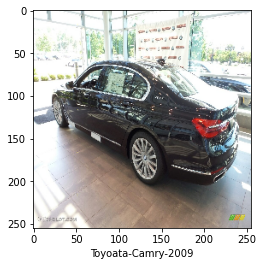

In [68]:
predictImage("test/2018-BMW-x7/15.jpg")

In [69]:
# subscription_id = '2b0cab8f-c0cb-4530-b8a1-753f9a6c3035'
# resource_group = 'FirstResource'
# workspace_name = 'ml-models'

# workspace = Workspace(subscription_id, resource_group, workspace_name)

# dataset = Dataset.get_by_name(workspace, name='testing1')
# dataset.download(target_path='.', overwrite=True)

test = ImageDataGenerator(rescale=1./255)

                                
test_generator = test.flow_from_directory(
    "test",
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 50 images belonging to 5 classes.


In [70]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1,steps=50/32)

2/1 [======================================] - 2s 1s/step


In [71]:
predicted_class_indices=np.argmax(pred,axis=1)

In [72]:
labels = (train_generator.class_indices)
labels = dict((x,y) for y,x in labels.items())
predictions = [labels[y] for y in predicted_class_indices]

In [73]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filenames":filenames,
                      "Predictions":predictions})

results

,Filenames,Predictions
0,Lexus-ES-2019/1.jpg,Lexus-ES-2019
1,Lexus-ES-2019/10.jpg,Ford-Explorer-2020
2,Lexus-ES-2019/100.JPG,Honda-Pilot-2008
3,Lexus-ES-2019/11.jpg,Toyoata-Camry-2009
4,Lexus-ES-2019/12.jpg,Ford-Explorer-2020
5,Lexus-ES-2019/13.jpg,Ford-Explorer-2020
6,Lexus-ES-2019/14.jpg,Lexus-ES-2019
7,Lexus-ES-2019/15.jpg,Lexus-ES-2019
8,Lexus-ES-2019/16.jpg,Honda-Pilot-2008
9,Lexus-ES-2019/17.jpg,Lexus-ES-2019
